In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

from module.tf_idf import Converter

In [2]:
hdf_path = '/workspace/data/title/'
file_name = '押絵と旅する男_predicted.h5'

converter = Converter('押絵と旅する男')
df, lists = converter.main()

df = pd.read_hdf(hdf_path+file_name)
print(len(df))
# print(df.keys())
# print(type(df['contexsts_label'][0]))

301


In [3]:
kakko = ["「", "」"]
drop_short_index = [i for i,x in enumerate(df['japanese_texts']) if len(x) <= 15]
drop_kakko_index = [i for i,x in enumerate(df['japanese_texts']) if x[0] in kakko]

drop_index = drop_kakko_index + drop_short_index
drop_index = list(set(drop_index))

df = df.drop(drop_index)
print(df.keys())
df.head()
# df = df.reset_index(drop=True)
# print(len(df))
# print(df.keys())
# df.head()

Index(['japanese_texts', 'english_texts', 'contexsts_label', 'picture_label'], dtype='object')


,japanese_texts,english_texts,contexsts_label,picture_label
0,この話が私の夢か私の一時的狂気の幻でなかったならば、あの押絵と旅をしていた男こそ狂人であった...,If this story was not a dream of mine or an il...,1,0
1,だが、夢が時として、どこかこの世界と喰違った別の世界を、チラリと覗かせてくれる様に、又狂人が...,But just as dreams sometimes give us a glimpse...,1,1
2,いつとも知れぬ、ある暖かい薄曇った日のことである。,"It was a warm, lightly cloudy day, at any time...",1,1
3,その時、私は態々魚津へ蜃気楼を見に出掛けた帰り途であった。,"At the time, I was on my way back from a trip ...",1,1
4,私がこの話をすると、時々、お前は魚津なんかへ行ったことはないじゃないかと、親しい友達に突っ込...,"When I tell this story, close friends sometime...",0,0


In [4]:
extract_df = df.query('contexsts_label=="1" & picture_label=="1"')
extract_df = extract_df.reset_index(drop=True)
# print(len(extract_df))

index = []
for i in range(len(extract_df)):
    for item in lists:
        # 入ってる
        if item in extract_df['japanese_texts'][i]:
            index.append(i)
            break
        
tfidf_df = extract_df.iloc[index]
tfidf_df = tfidf_df.reset_index(drop=True)
print(len(tfidf_df))
display(tfidf_df.head())

23


,japanese_texts,english_texts,contexsts_label,picture_label
0,夢の中の景色は、映画と同じに、全く色彩を伴わぬものであるのに、あの折の汽車の中の景色丈けは、...,"The scenery in the dream, like in the film, is...",1,1
1,曖昧な形の、真黒な巨大な三角形が、塔の様に積重なって行ったり、またたく間にくずれたり、横に延...,"Huge, black triangles of ambiguous shapes pile...",1,1
2,蜃気楼の魔力が、人間を気違いにするものであったなら、恐らく私は、少くとも帰り途の汽車の中まで...,If the mirage's magic was to make people go ma...,1,1
3,二時間の余も立ち尽して、大空の妖異を眺めていた私は、その夕方魚津を立って、汽車の中に一夜を過...,I stood there for more than two hours gazing a...,1,1
4,魚津の駅から上野への汽車に乗ったのは、夕方の六時頃であった。,It was around six in the evening when I boarde...,1,1


In [5]:
text = tfidf_df['english_texts'][0]
text = tfidf_df['english_texts'].tolist()
# print(text[1])
print(len(text))

23


In [6]:
def show_image(path):
    """ 画像の表示 """
    #path = self.image + "/{}.png".format(index)
    print(path)
    im = Image.open(path)
    im_list = np.asarray(im)
    plt.imshow(im_list)
    plt.axis("off")
    plt.show()

# title = '悪霊物語'
# img_idx = img_idx_list[0]
# path = f'/workspace/data/img/{title}/{img_idx}.png'
# show_image(path)

画像と文章はマッチしているか？

夢の中の景色は、映画と同じに、全く色彩を伴わぬものであるのに、あの折の汽車の中の景色丈けは、それもあの毒々しい押絵の画面が中心になって、紫と臙脂の勝た色彩で、まるで蛇の眼の瞳孔の様に、生々しく私の記憶に焼ついている。

/workspace/data/create_image/押絵と旅する男/押絵と旅する男_0/_0.png


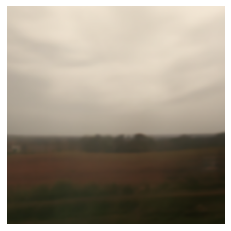

KeyboardInterrupt: Interrupted by user

In [7]:
# example /workspace/data/create_image/押絵と旅する男/押絵と旅する男_0/---.png
path = '/workspace/data/create_image/押絵と旅する男/押絵と旅する男_'
jp_text_list = tfidf_df['japanese_texts'].tolist()[:]

all_select_list = []
for i in range(len(jp_text_list)):
    img_path = f'{path}{str(i)}/_0.png'
    jp_text = jp_text_list[i]
    
    """ 画像と文章が合っているか """
    print("画像と文章はマッチしているか？")
    print()
    ans = None
    while ans is None:
        # 日本語を表示
        print(jp_text)
        print()
        # 画像を表示
        show_image(img_path)
        # ansは文字列
        ans = input("0:マッチしてない       1:マッチしてる")
        print()
        
        # 0か1以外だったらループする
        if not (ans == '0' or ans == '1'):
            ans = None
        if ans == '1':
            select_list = [i, jp_text]
            all_select_list.append(select_list)

In [ ]:
print(len(all_select_list))
print(all_select_list)

In [ ]:
for select_list in all_select_list:
#     select_list = all_select_list[i]
    img_path = f'{path}{str(select_list[0])}/_0.png'
    print(select_list[1])
    print()
    show_image(img_path)
    print()